In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import missingno as ms

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv("liver1.csv")

In [8]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<AxesSubplot:>

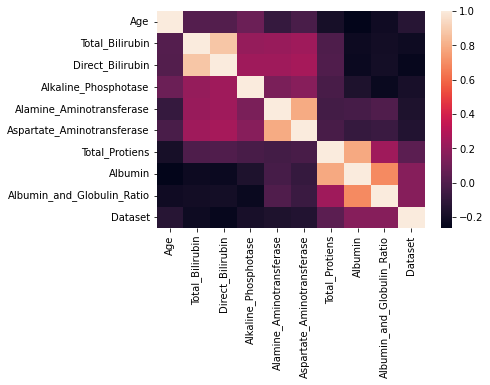

In [11]:
sns.heatmap(df.corr())

In [12]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

<AxesSubplot:>

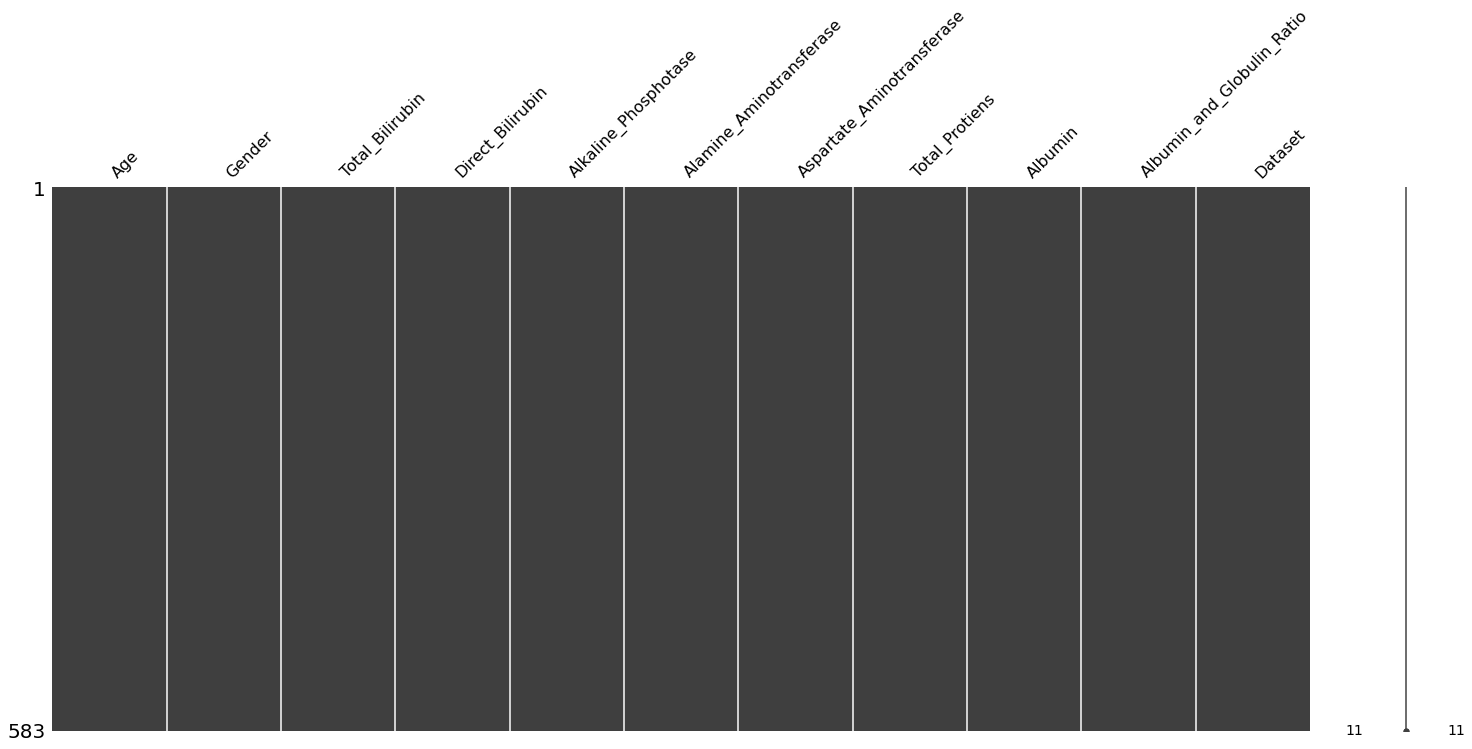

In [14]:
ms.matrix(df)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Dataset',axis=1),df['Dataset'],test_size=0.05,random_state=11)

In [17]:
from sklearn.tree import DecisionTreeClassifier
id3=DecisionTreeClassifier(criterion='entropy')
model=id3.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [18]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 2 1]
129    1
49     1
307    1
297    2
288    1
271    2
513    1
33     2
453    1
569    1
515    1
169    1
109    2
88     1
137    1
530    2
528    1
301    1
282    1
143    1
324    1
309    1
202    2
427    1
219    1
466    2
272    1
70     1
551    2
96     1
Name: Dataset, dtype: int64


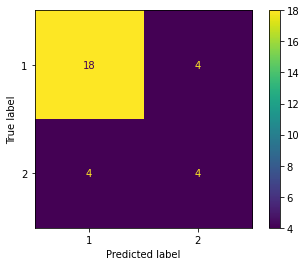

In [19]:
from sklearn import metrics
metrics.plot_confusion_matrix(model,x_test,y_test)

In [20]:
from sklearn.metrics import accuracy_score
er=accuracy_score(y_test,y_pred)
print(er)

0.7333333333333333


In [24]:
import pickle
pickle.dump(model,open("picklefile.pkl","wb"))

In [37]:
pickeld_model=pickle.load(open("picklefile.pkl","rb"))
pickeld_model.predict(np.array(t.loc[0]).reshape(1,-1))

array([1], dtype=int64)

In [25]:
t=df.drop("Dataset",axis=1)
t

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [36]:

model.predict(np.array(t.loc[0]).reshape(1,-1))

array([1], dtype=int64)

In [38]:
t.loc[0]

Age                            65.0
Gender                          0.0
Total_Bilirubin                 0.7
Direct_Bilirubin                0.1
Alkaline_Phosphotase          187.0
Alamine_Aminotransferase       16.0
Aspartate_Aminotransferase     18.0
Total_Protiens                  6.8
Albumin                         3.3
Albumin_and_Globulin_Ratio      0.9
Name: 0, dtype: float64